<a href="https://colab.research.google.com/github/7rashhi/LB23-weekday/blob/main/convDPsoftmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
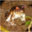

In [4]:
x_train[0]

In [5]:
print(y_train.ndim)
print(y_test.ndim)

2
2


In [6]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [7]:
print(y_train.shape,y_train.ndim)
print(y_test.shape,y_test.ndim)


(50000,) 1
(10000,) 1


NameError: name 'classes' is not defined

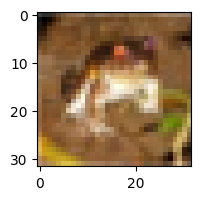

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])
plt.xlabel(classes[y_train[0]])
plt.show()


In [9]:
def sample_imag(x,y,val):
  plt.figure(figsize=(15,2))
  plt.imshow(x[val])
  plt.xlabel(classes[y[val]])
  plt.show()


In [11]:
x_train=x_train/255.0  ###normalise the data#
x_test=x_test/255.0

In [12]:
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
MaxPooling2D((2,2)),

Conv2D(64,(3,3),activation='relu'),
MaxPooling2D((2,2)),

Flatten(),

Dense(64,activation='relu'),
Dense(10,activation='softmax')
 ])

In [13]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])



In [14]:
model.fit(x_train,y_train,epochs=7)

Epoch 1/7
1563/1563 [==============================] - 11s 5ms/step - loss: 1.4854 - accuracy: 0.4654
Epoch 2/7
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1393 - accuracy: 0.6022
Epoch 3/7
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0113 - accuracy: 0.6469
Epoch 4/7
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9319 - accuracy: 0.6782
Epoch 5/7
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8670 - accuracy: 0.7009
Epoch 6/7
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8142 - accuracy: 0.7181
Epoch 7/7
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7685 - accuracy: 0.7338


In [15]:
model.evaluate(x_test,y_test) # to see wheteher over or under fitting evaluate

313/313 [==============================] - 1s 3ms/step - loss: 0.9412 - accuracy: 0.6885


[0.941183865070343, 0.6884999871253967]

In [ ]:
##not overfitting as such running for epochs=10

#then showing overfitting

In [16]:
y_pred=model.predict(x_test)
y_pred[:1]

313/313 [==============================] - 1s 2ms/step


array([[0.00306117, 0.00079146, 0.00182489, 0.32995248, 0.00083138,
        0.01464887, 0.0083689 , 0.00076791, 0.63886034, 0.00089263]],
      dtype=float32)

In [17]:
y_class=[np.argmax(element)for element in y_pred]
y_class[:10] ## index of max value

[8, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [18]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)